In [1]:
from data_processing import EC_pH, get_one_sequential, get_multi_sequential
from training import train_model, DataGenerator
from models import single_RNN, RNN_seq2seq
from testing import model_eval
from plot_model import train_loss_plot, predict_plot

# Not Seq2Seq

In [14]:
# data split and scaling
train_data, val_data, test_data, u, l = EC_pH(path = '/content/drive/MyDrive/Colab Notebooks/Water_prediction_EC_pH/EEMD1.xlsx',
                                              type = 'EC')
# data sliding
X_train, y_train = get_one_sequential(train_data, window = 24, interval = 48)
X_val, y_val = get_one_sequential(val_data, window = 24, interval = 48)
X_test, y_test = get_one_sequential(test_data, window = 24, interval = 48)

X, y = [X_train, X_val, X_test], [y_train, y_val, y_test]

In [15]:
# model 학습
model = single_RNN(model_type = 'lstm', unit = 32, window = 24)
history = train_model(model = model, save_path = '/content/test_model.keras', optim = "Adam",
             X = X, y = y, lr = 0.001, batch_size = 128, epochs = 5)
model_eval(model = model, last = False, X = X, y = y, u = u, l = l)

Epoch 1/5
105/106 [============================>.] - ETA: 0s - loss: 0.0208
Epoch 1: val_loss improved from inf to 0.01669, saving model to /content/test_model.keras
106/106 [==============================] - 10s 55ms/step - loss: 0.0206 - val_loss: 0.0167
Epoch 2/5
106/106 [==============================] - ETA: 0s - loss: 0.0051
Epoch 2: val_loss improved from 0.01669 to 0.01434, saving model to /content/test_model.keras
106/106 [==============================] - 4s 35ms/step - loss: 0.0051 - val_loss: 0.0143
Epoch 3/5
106/106 [==============================] - ETA: 0s - loss: 0.0052
Epoch 3: val_loss did not improve from 0.01434
106/106 [==============================] - 4s 41ms/step - loss: 0.0052 - val_loss: 0.0220
Epoch 4/5
106/106 [==============================] - ETA: 0s - loss: 0.0053
Epoch 4: val_loss did not improve from 0.01434
106/106 [==============================] - 4s 34ms/step - loss: 0.0053 - val_loss: 0.0209
Epoch 5/5
106/106 [==============================] - ETA:

,R2(%),MAE,RMSE,MAPE(%)
Train,76.50,9.03,12.50,4.96
Validation,40.86,14.91,19.73,6.30
Test,37.50,16.22,21.37,8.79


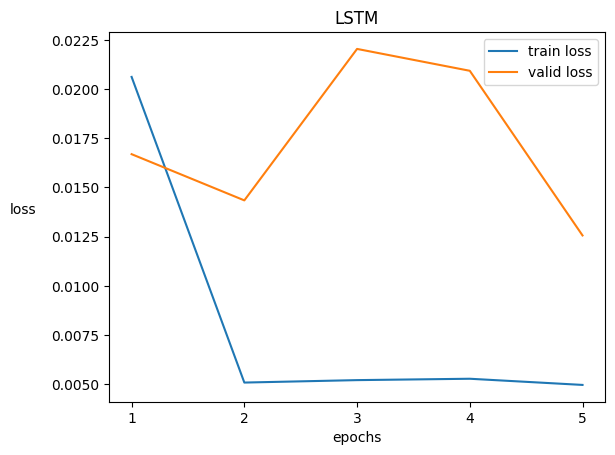

In [16]:
train_loss_plot(history = history, model_name = 'LSTM', epochs = 5, save_path = 'loss.png')

140/140 [==============================] - 1s 7ms/step


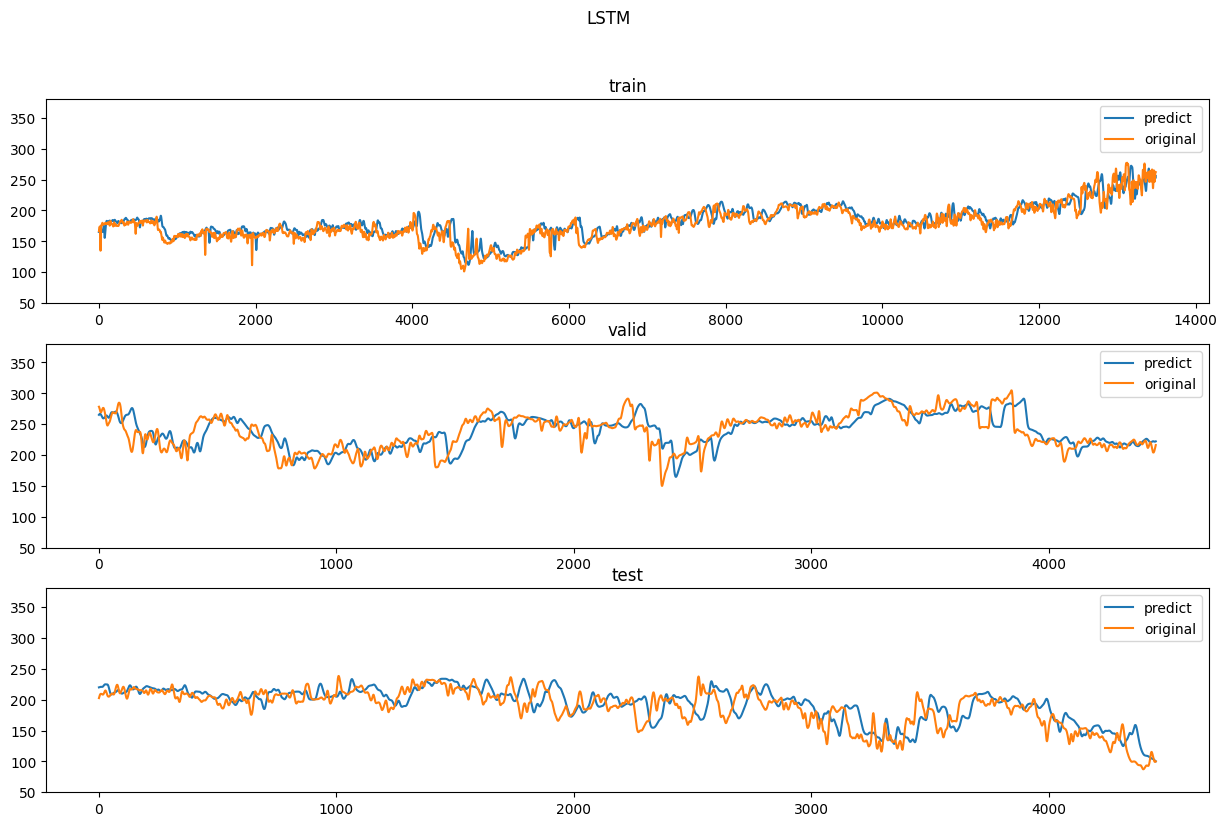

In [17]:
predict_plot(model = model, last = False, X = X, y = y, u = u, l = l, title = 'LSTM', save_path = 'pred.png')

# seq2seq

In [18]:
X_train, y_train = get_multi_sequential(train_data, window = 24, interval = 48)
X_val, y_val = get_multi_sequential(val_data, window = 24, interval = 48)
X_test, y_test = get_multi_sequential(test_data, window = 24, interval = 48)

X, y = [X_train, X_val, X_test], [y_train, y_val, y_test]

In [19]:
model = RNN_seq2seq(model_type = 'lstm', unit = 32, window = 24, interval = 48)
history = train_model(model = model, save_path = '/content/test_model.keras', optim = "Adam",
             X = X, y = y, lr = 0.001, batch_size = 128, epochs = 5)
model_eval(model = model, last = True, X = X, y = y, u = u, l = l)

Epoch 1/5
106/106 [==============================] - ETA: 0s - loss: 0.0276
Epoch 1: val_loss improved from inf to 0.02364, saving model to /content/test_model.keras
106/106 [==============================] - 11s 73ms/step - loss: 0.0276 - val_loss: 0.0236
Epoch 2/5
105/106 [============================>.] - ETA: 0s - loss: 0.0073
Epoch 2: val_loss improved from 0.02364 to 0.01728, saving model to /content/test_model.keras
106/106 [==============================] - 5s 49ms/step - loss: 0.0074 - val_loss: 0.0173
Epoch 3/5
106/106 [==============================] - ETA: 0s - loss: 0.0065
Epoch 3: val_loss improved from 0.01728 to 0.01659, saving model to /content/test_model.keras
106/106 [==============================] - 5s 49ms/step - loss: 0.0065 - val_loss: 0.0166
Epoch 4/5
106/106 [==============================] - ETA: 0s - loss: 0.0057
Epoch 4: val_loss improved from 0.01659 to 0.01436, saving model to /content/test_model.keras
106/106 [==============================] - 6s 55ms/st

,R2(%),MAE,RMSE,MAPE(%)
Train,75.40,8.58,11.89,4.78
Validation,18.10,16.06,20.13,6.95
Test,34.36,15.43,20.45,8.51


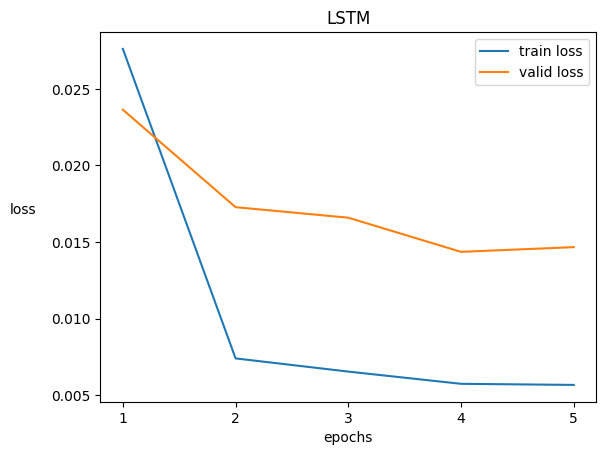

In [20]:
train_loss_plot(history = history, model_name = 'LSTM', epochs = 5, save_path = 'loss.png')

140/140 [==============================] - 1s 9ms/step


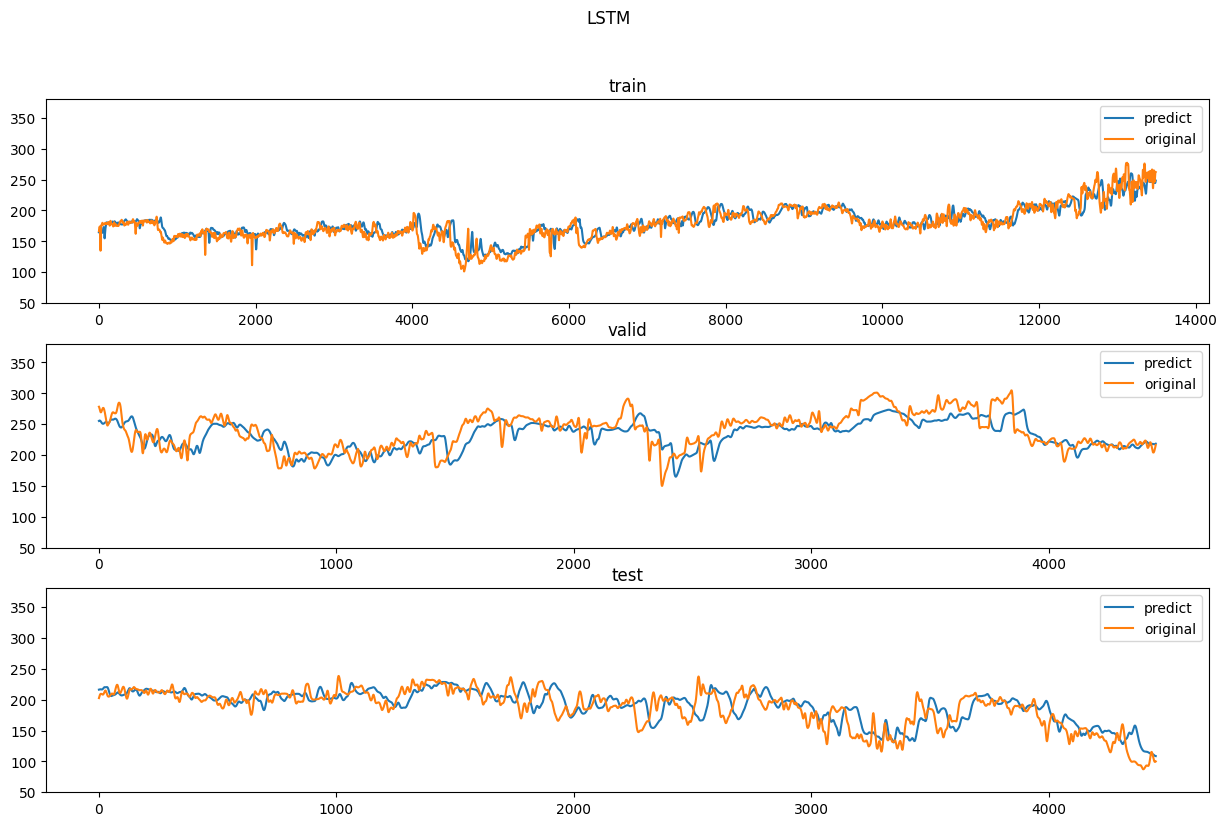

In [21]:
predict_plot(model = model, last = True, X = X, y = y, u = u, l = l, title = 'LSTM', save_path = 'pred.png')